
# Exploring and Processing Data
#### Pre-requisites of Scikit Learn:
- data as numpy array or pandas df
- no missing values
- all numerical data

#### Data Pre-processing steps
- structured data
- no missing values
- no outliers
- understanding the variables which lead to high variance in our DV - through data visualizations
- understanding the inter-correlations bw the IVs, through data visualization, and features reductions
- feature engineering

In [4]:
# imports
import pandas as pd
import numpy as np
import os
#This module provides a portable way of using operating system dependent functionality. 
#If you just want to read or write a file see open(), if you want to manipulate paths, 
#see the os.path module, and if you want to read all the lines in all the files on the 
#command line see the fileinput module.
np.set_printoptions(precision = 2, suppress = True)

In [5]:
# read the data with all default parameters
train_df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\titanic_train.csv', index_col='PassengerId') #declaring 'PassengerId' as the index col
unseen_df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\titanic_test.csv', index_col='PassengerId')

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# get the type
type(train_df)

pandas.core.frame.DataFrame

In [8]:
#This way we can assign a path dynamically - not constrained with my local pc path

## Basic Structure

In [9]:
# use .info() to get brief information about the dataframe 
train_df.info() #notice 714 non-null values rest are null in age col

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 892 to 1311
Data columns (total 10 columns):
Pclass      420 non-null int64
Name        420 non-null object
Sex         420 non-null object
Age         334 non-null float64
SibSp       420 non-null int64
Parch       420 non-null int64
Ticket      420 non-null object
Fare        419 non-null float64
Cabin       91 non-null object
Embarked    420 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 36.1+ KB


#### Let's concatenate train and test data for data pre-processing. Since the y col i.e Survived column is not existent in unseen_df, so we'll create one with a default value of -888

In [11]:
unseen_df['Survived'] = -888 # Adding Survived with a default value for test data-set; for train data we already have

In [12]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
unseen_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [14]:
df = pd.concat((train_df, unseen_df),axis=0) #concatenating by rows

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 11 columns):
Age         1048 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1310 non-null float64
Name        1311 non-null object
Parch       1311 non-null int64
Pclass      1311 non-null int64
Sex         1311 non-null object
SibSp       1311 non-null int64
Survived    1311 non-null int64
Ticket      1311 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.9+ KB


In [16]:
# use .head() to get top 5 rows
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282


In [17]:
# use .tail() to get last 5 rows
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668
1310,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
1311,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272


In [18]:
# column selection using dot
df.Name[:5]

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
# selecting multiple columns using a list of column name strings
df[['Name','Age']][:5]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


In [20]:
# indexing : use loc for label based indexing 
# all columns
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [21]:
# selecting column range
df.loc[5:10, 'Age' : 'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [22]:
# selecting discrete columns
df.loc[5:10, ['Survived', 'Fare','Embarked']]

,Survived,Fare,Embarked
PassengerId,,,
5,0,8.0500,S
6,0,8.4583,Q
7,0,51.8625,S
8,0,21.0750,S
9,1,11.1333,S
10,1,30.0708,C


In [23]:
# indexing : use iloc for position based indexing 
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [24]:
# filter rows based on the condition 
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 844


In [25]:
# use & or | operators to build complex logic
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class: 179


## Summary Statistics

In [26]:
# use .describe() to get statistics for all numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1048.000000,1310.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,29.901880,33.255966,0.384439,2.295957,0.498856,-284.224256
std,14.410128,51.728993,0.865030,0.837649,1.041046,414.693622
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [27]:
# numerical feature
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean())) # mean
print('Median fare : {0}'.format(df.Fare.median())) # median

Mean fare : 33.25596648854965
Median fare : 14.4542


In [28]:
# dispersion measures
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2675.888705718443
Standard deviation fare : 51.728992892945854


In [29]:
%matplotlib inline

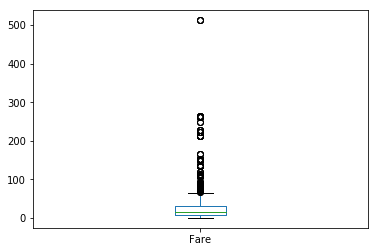

In [30]:
# box-whisker plot
df.Fare.plot(kind='box')

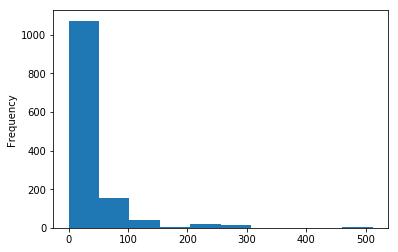

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Fare'].plot(kind = "hist")
plt.show()

In [32]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1048.000000,295,1309,1310.000000,1311,1311.000000,1311.000000,1311,1311.000000,1311.000000,1311
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,915,NaN,3,NaN,NaN,844,NaN,NaN,11
mean,29.901880,NaN,NaN,33.255966,NaN,0.384439,2.295957,NaN,0.498856,-284.224256,NaN
std,14.410128,NaN,NaN,51.728993,NaN,0.865030,0.837649,NaN,1.041046,414.693622,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [33]:
# categorical column : Counts
df.Sex.value_counts()

male      844
female    467
Name: Sex, dtype: int64

In [34]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

male      0.643783
female    0.356217
Name: Sex, dtype: float64

In [35]:
df.Survived.value_counts()

 0      549
-888    420
 1      342
Name: Survived, dtype: int64

In [36]:
# apply on other columns
df[df.Survived != -888].Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [37]:
# count : Passenger class
df.Pclass.value_counts() 

3    711
1    323
2    277
Name: Pclass, dtype: int64

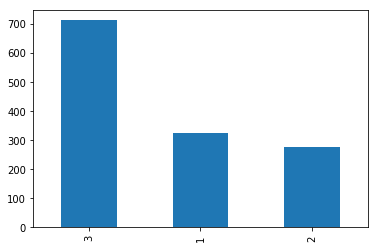

In [38]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

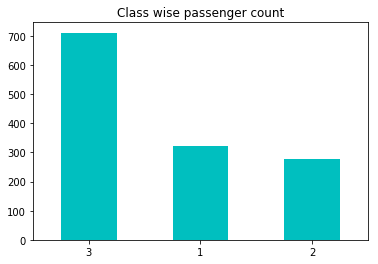

In [39]:
# title : to set title, color : to set color,  rot : to rotate labels 
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c');

## Distributions

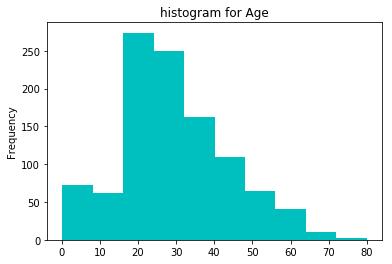

In [40]:
# use hist to create histogram
df.Age.plot(kind='hist', title='histogram for Age', color='c');

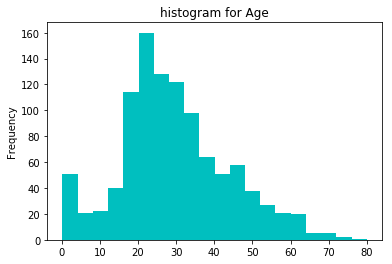

In [41]:
# use bins to add or remove bins
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

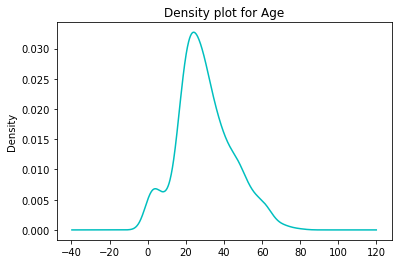

In [42]:
# use kde for density plot
#Kernel Density Estimation
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

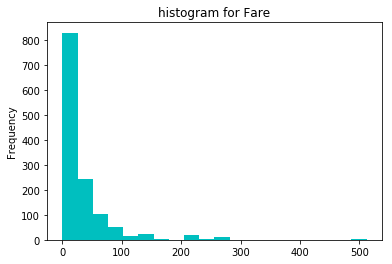

In [43]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [44]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.40
skewness for fare : 4.37


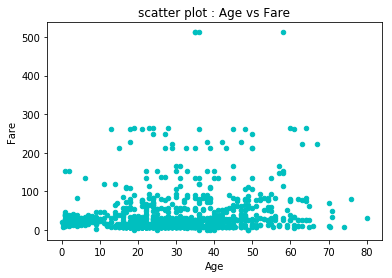

In [45]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

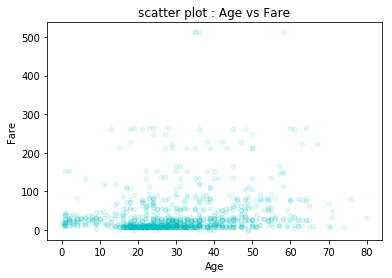

In [46]:
# use alpha to set the transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.1);

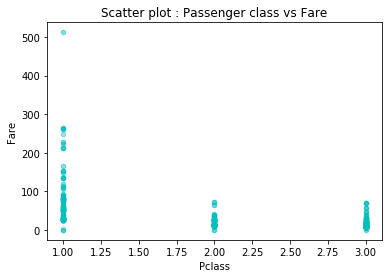

In [47]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

## Grouping and Aggregations

In [48]:
# group by 
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [49]:
# group by 
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [50]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [51]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [52]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [53]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.286302      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [54]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstabs

In [55]:
# crosstab on Sex and Pclass - similar to pivot tables in excel
pd.crosstab(df.Sex, df.Pclass, normalize = True) 
#normalize = true gives %age of total passengers
#use pd.value_counts(df.Sex) # to get the freq table based on cat var Sex

Pclass,1,2,3
Sex,,,
female,0.109840,0.080854,0.165523
male,0.136537,0.130435,0.376812


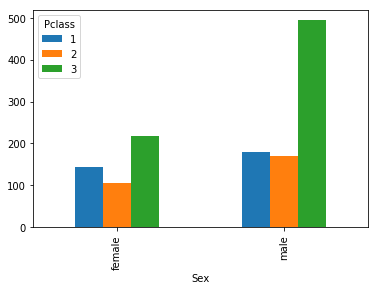

In [56]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

## Pivots

In [57]:
# pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.347516
male,41.029272,30.815380,25.986657


In [58]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.347516
male    1         41.029272
        2         30.815380
        3         25.986657
Name: Age, dtype: float64

In [59]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.347516
male    1         41.029272
        2         30.815380
        3         25.986657
Name: Age, dtype: float64

In [60]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.347516
male,41.029272,30.815380,25.986657


## Data Munging : Working with missing values

In [61]:
# use .info() to detect missing values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 11 columns):
Age         1048 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1310 non-null float64
Name        1311 non-null object
Parch       1311 non-null int64
Pclass      1311 non-null int64
Sex         1311 non-null object
SibSp       1311 non-null int64
Survived    1311 non-null int64
Ticket      1311 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.9+ KB


### Feature : Embarked

In [62]:
df.Embarked.isnull()[:3]

PassengerId
1    False
2    False
3    False
Name: Embarked, dtype: bool

In [63]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]
#Multiple ways to impute for embarked:
# - 1st is that impute with the mode value
# - 2nd for Pclass =1 and fare close to 80, find the embarked category and impute by that
# - 3rd for Pclass =1, Sex = female and fare close to 80, find the embarked category and impute by that

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [64]:
# how many people embarked at different points
df.Embarked.value_counts()

S    915
C    270
Q    124
Name: Embarked, dtype: int64

In [65]:
# which embarked point has higher survival count
tab=pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked, margins=True)
tab

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [66]:
tab=tab.loc[:,:]/tab.loc["All", :]

In [67]:
tab.drop("All", axis = 0, inplace = True)
tab.drop("All", axis = 1, inplace = True)

In [68]:
tab

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


In [69]:
df.Embarked.value_counts()

S    915
C    270
Q    124
Name: Embarked, dtype: int64

In [70]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [71]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [72]:
# Option 2 : explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()
# for Pclass =1 and fare close to 80, find the embarked category and impute by that: it will be C

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [73]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)
# for Pclass =1 and fare close to 80, find the embarked category and impute by that: it will be C

In [74]:
# check if any null value remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [75]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 11 columns):
Age         1048 non-null float64
Cabin       295 non-null object
Embarked    1311 non-null object
Fare        1310 non-null float64
Name        1311 non-null object
Parch       1311 non-null int64
Pclass      1311 non-null int64
Sex         1311 non-null object
SibSp       1311 non-null int64
Survived    1311 non-null int64
Ticket      1311 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.9+ KB


### Feature : Fare has Missing Values

In [76]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [77]:
#Find the median fare for pclass = 3 and embarked = S and fill the NAs with this value
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print(median_fare)

8.05


In [78]:
df.Fare.fillna(median_fare, inplace=True)

In [79]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 11 columns):
Age         1048 non-null float64
Cabin       295 non-null object
Embarked    1311 non-null object
Fare        1311 non-null float64
Name        1311 non-null object
Parch       1311 non-null int64
Pclass      1311 non-null int64
Sex         1311 non-null object
SibSp       1311 non-null int64
Survived    1311 non-null int64
Ticket      1311 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.9+ KB


### Feature : Age

In [80]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 10

In [81]:
# return null rows
df[df.Age.isnull()]
#We notice a lot of values in Age column are null values

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


#### option 1 : replace all missing age with mean value

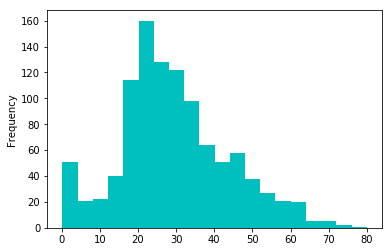

In [82]:
df.Age.plot(kind='hist', bins=20, color='c');

In [83]:
# get mean
df.Age.mean()

29.901879770992366

issue : due to few high values of 70's and 80's pushing the overall mean



In [84]:
# replace the missing values
# df.Age.fillna(df.Age.mean(), inplace=True)

#### option 2 : replace with median age of gender

In [85]:
# median values
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [86]:
df.notnull() #gives true if not nullb

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,True,False,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
5,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1307,True,False,True,True,True,True,True,True,True,True,True
1308,False,False,True,True,True,True,True,True,True,True,True
1309,False,False,True,True,True,True,True,True,True,True,True


In [87]:
[not val for val in df.isnull().iloc[1,:]]

[True, True, True, True, True, True, True, True, True, True, True]

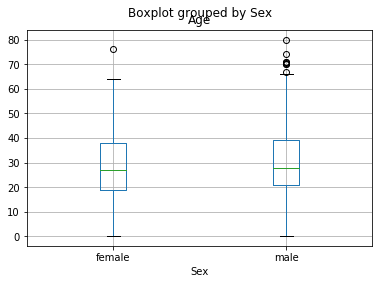

In [88]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');

In [89]:
import seaborn as sns

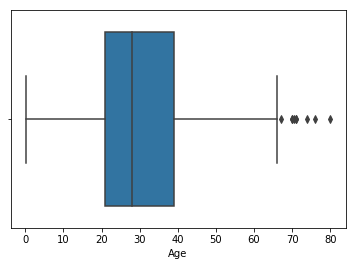

In [90]:
sns.boxplot(x=df['Age'],data=df)

In [91]:
# replace : 
age_sex_median = df.groupby('Sex').Age.transform('median')
df.groupby('Sex').Age.transform('median')
#this will give median age of males to all males and median age of females to all females in the df.

# df.Age.fillna(age_sex_median, inplace=True) 
#so for which-ever Passenger Id median age is missing, it will be imputed


PassengerId
1       28.0
2       27.0
3       27.0
4       27.0
5       28.0
        ... 
1307    28.0
1308    28.0
1309    28.0
1310    28.0
1311    27.0
Name: Age, Length: 1311, dtype: float64

In [92]:
df["Age"] = np.where(df.Age.notnull(), df.Age, age_sex_median )

In [93]:
#grouping by the categorical variable and using the transform method, makes sense if the the median age according to sex is significantly different. 

#### option 3 : replace with median age of Pclass

In [94]:
#?df.boxplot

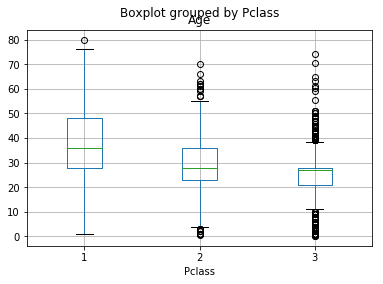

In [95]:
#let's have a look at the distribution of age wrt Pclass
df[df.Age.notnull()].boxplot('Age','Pclass');

In [96]:
# replace : 
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median , inplace=True)

#### option 4 : replace with median age of title

In [97]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
1310                                     Kelly, Mr. James
1311                     Wilkes, Mrs. James (Ellen Needs)
Name: Name, Length: 1311, dtype: object

In [98]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [99]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1307        mr
1308        mr
1309    master
1310        mr
1311       mrs
Name: Name, Length: 1311, dtype: object

In [100]:
"""
#Another way of extracting titles
df['Title']=0
for i in data: #iterate over column names
    df['Title']=df.Name.str.extract('([A-Za-z]+)\.') 
#extracting the titles and . escaped by an escape character    
"""

"\n#Another way of extracting titles\ndf['Title']=0\nfor i in data: #iterate over column names\n    df['Title']=df.Name.str.extract('([A-Za-z]+)\\.') \n#extracting the titles and . escaped by an escape character    \n"

In [101]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [102]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]



In [103]:
# create Title feature
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [104]:
# head 
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


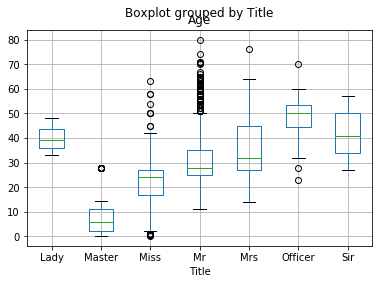

In [105]:
# Box plot of Age with title
df[df.Age.notnull()].boxplot('Age','Title');

In [106]:
title_age_median = df.groupby('Title').Age.median()
title_age_median

Title
Lady       39.0
Master      6.0
Miss       24.0
Mr         28.0
Mrs        32.0
Officer    50.0
Sir        41.0
Name: Age, dtype: float64

In [107]:
#df.transform()

In [108]:
title_age_median = df.groupby('Title').Age.transform('median')
#this will create a series of median ages according to the title

In [109]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)
#title gives a more accurate imputation of nas as titles are according to Mr. Mrs. Master Ms 
#so age group will vary accordingly

In [110]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 12 columns):
Age         1311 non-null float64
Cabin       295 non-null object
Embarked    1311 non-null object
Fare        1311 non-null float64
Name        1311 non-null object
Parch       1311 non-null int64
Pclass      1311 non-null int64
Sex         1311 non-null object
SibSp       1311 non-null int64
Survived    1311 non-null int64
Ticket      1311 non-null object
Title       1311 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 173.1+ KB


#### Imputation with ML: We can convert this into a regression problem, where Age can be y var and other vars can be IVs. Given the adj. R2 values is high (which means that the IVs are able to explain the variance in the data), we can use the rows with Null as test data and rest of the rows as training data. Preferably use those columns which have less nulls. 

In [111]:
pd.crosstab(df.Title,df.Sex).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

Title,Lady,Master,Miss,Mr,Mrs,Officer,Sir
Sex,,,,,,,
female,3,0,262,0,201,1,0
male,0,61,0,758,0,14,11


## Working with outliers
Many times the data is incorrect / impossible. It can be found out using outlier analysis. 

### Age

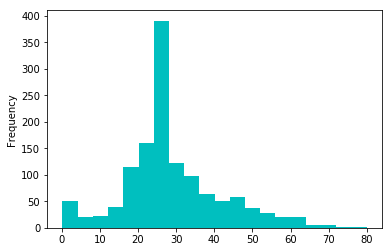

In [112]:
# use histogram to get understand the distribution
df.Age.plot(kind='hist', bins=20, color='c');

In [113]:
df.shape

(1311, 12)

In [114]:
df["Age_Sqroot"] = df.Age**.5

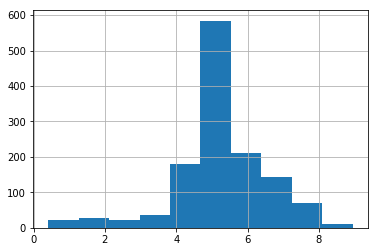

In [115]:
df.Age_Sqroot.hist()

In [116]:
#when the distribution is slightly right skewed, try taking an underroot to check if it converts to normal
#when the distribution is slightly left skewed, try taking square to check if the it converts to normal

#if it quiet skewed, then taking a log should help for left skewed as well as right skewed.

In [117]:
#Incase of Age, we'll just impute the outliers with bottom threshold values and top threshold values, since squareroot is not helping us covnert to a normal dist

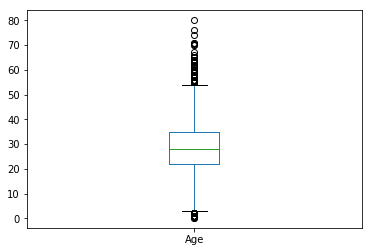

In [118]:
df.Age.plot(kind = "box")

In [119]:
q25, q75 = np.percentile(df.Age, 25), np.percentile(df.Age, 75)
iqr = q75-q25
iqr

13.0

In [120]:
q25,q75=df.Age.quantile(.25), df.Age.quantile(.75)
iqr = q75 - q25
iqr

13.0

In [121]:
bottom_threshold = q25 - 1.5*iqr
top_threshold = q75 + 1.5*iqr
top_threshold

54.5

In [122]:
df.loc[df.Age > top_threshold, "Age"] = top_threshold
df.loc[df.Age < bottom_threshold, "Age"] = bottom_threshold

### Fare

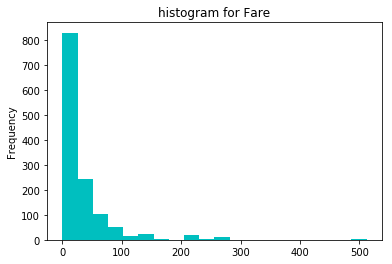

In [123]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

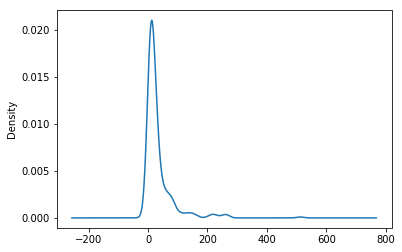

In [124]:
df["Fare"].plot(kind = "kde")

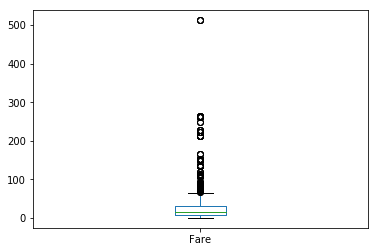

In [125]:
# box plot to indentify outliers 
df.Fare.plot(kind='box');

In [126]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Age_Sqroot
PassengerId,,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss,5.916080
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr,6.000000
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr,5.916080
1235,54.5,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs,7.615773


In [127]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate fare value of 0 as log(0) is not defined 

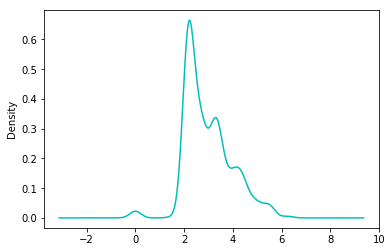

In [128]:
# Histogram of LogFare
LogFare.plot(kind="kde", color='c');

In [129]:
df['Fare'].quantile([.25,.5,.75,1]),

(0.25      7.8958
 0.50     14.4542
 0.75     31.2750
 1.00    512.3292
 Name: Fare, dtype: float64,)

In [130]:
df.Fare[:6]

PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
6     8.4583
Name: Fare, dtype: float64

In [131]:
# binning the fare column
pd.qcut(df.Fare, 4) #means cut the fare col into quartile values
#following assigns the (lowerlimit, upperlimit) tupple to fare col.

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
1310      (-0.001, 7.896]
1311      (-0.001, 7.896]
Name: Fare, Length: 1311, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [132]:
Fare_discrete = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization
Fare_discrete

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1307     very_low
1308          low
1309         high
1310     very_low
1311     very_low
Name: Fare, Length: 1311, dtype: category
Categories (4, object): [very_low < low < high < very_high]

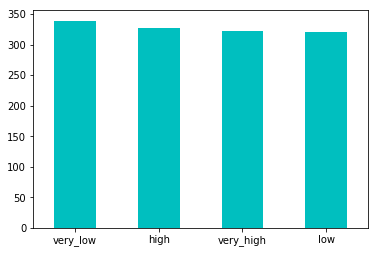

In [133]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [134]:
df.Fare

PassengerId
1        7.2500
2       71.2833
3        7.9250
4       53.1000
5        8.0500
         ...   
1307     7.2500
1308     8.0500
1309    22.3583
1310     7.8292
1311     7.0000
Name: Fare, Length: 1311, dtype: float64

In [135]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

----

## Feature Engineering

### Feature : Age State ( Adult or Child )

In [136]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [137]:
# AgeState Counts
df['AgeState'].value_counts()

Adult    1157
Child     154
Name: AgeState, dtype: int64

In [138]:
df.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Age_Sqroot,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,4.690416,very_low,Adult


In [139]:
df.Sex = df.Sex.astype("category")

In [140]:
df[df.Survived !=-888].groupby(["AgeState", "Sex"]).Survived.mean().unstack()

Sex,female,male
AgeState,,
Adult,0.752896,0.165703
Child,0.690909,0.396552


In [141]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,497,52
1,281,61


In [142]:
279/(279+495)

0.36046511627906974

In [143]:
63/(54+63)

0.5384615384615384

### Feature : FamilySize

In [144]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

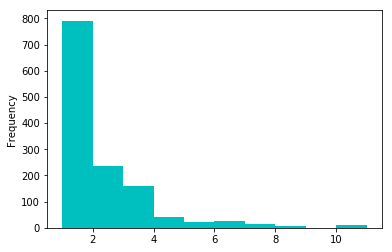

In [145]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c'); #cymk model

In [146]:
# further explore this family with max family members
df.loc[df.FamilySize == df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
...,...,...,...,...
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [147]:
tab = pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)
tab

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [148]:
tab/tab.sum(axis = 0)
#70% of the people with family size 1 died. The ratio decreases until a family size of 4.
#Family size looks like a key variable in determining the survival rate

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,0.696462,0.447205,0.421569,0.275862,0.8,0.863636,0.666667,1.0,1.0
1,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


We notice that the highest survival %age survival is when the family size is 4, as the ratio 21:8 is the  highest.

### New Feature : IsMother

In [149]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [150]:
# Crosstab with IsMother
tab = pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

In [151]:
tab

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [152]:
303/(533+303)

0.3624401913875598

In [153]:
39/(39+16)

0.7090909090909091

### Deck

In [154]:
# explore Cabin values
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1307     NaN
1308     NaN
1309     NaN
1310     NaN
1311     NaN
Name: Cabin, Length: 1311, dtype: object

In [155]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [156]:
# look at the Cabin = T. All other cabins named differently, looks like this is a typing error, so we'll replace by NaN
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Age_Sqroot,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,6.708204,very_high,Adult,1,0


In [157]:
# set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [158]:
# look at the unique values of Cabin again
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [159]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z') #where-ever NULL in cabin, make it deck Z
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [160]:
# check counts
df.Deck.value_counts()

Z    1017
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [161]:
# use crosstab to look into survived feature cabin wise
tab = pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck, margins=True)

In [162]:
tab/tab.loc["All", :]

Deck,A,B,C,D,E,F,G,Z,All
Survived,,,,,,,,,
0,0.533333,0.255319,0.40678,0.242424,0.25,0.384615,0.5,0.700581,0.616162
1,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.299419,0.383838
All,1.000000,1.000000,1.00000,1.000000,1.00,1.000000,1.0,1.000000,1.000000


In [163]:
# info command 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 18 columns):
Age           1311 non-null float64
Cabin         294 non-null object
Embarked      1311 non-null object
Fare          1311 non-null float64
Name          1311 non-null object
Parch         1311 non-null int64
Pclass        1311 non-null int64
Sex           1311 non-null category
SibSp         1311 non-null int64
Survived      1311 non-null int64
Ticket        1311 non-null object
Title         1311 non-null object
Age_Sqroot    1311 non-null float64
Fare_Bin      1311 non-null category
AgeState      1311 non-null object
FamilySize    1311 non-null int64
IsMother      1311 non-null int32
Deck          1311 non-null object
dtypes: category(2), float64(3), int32(1), int64(5), object(7)
memory usage: 211.8+ KB


### Categorical Feature Encoding

In [164]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [165]:
#nominal categorical variables for which dummies need to be created
df[['Deck', 'Pclass','Title', 'Embarked','AgeState']].head(3)

,Deck,Pclass,Title,Embarked,AgeState
PassengerId,,,,,
1,Z,3,Mr,S,Adult
2,C,1,Mrs,C,Adult
3,Z,3,Miss,S,Adult


In [166]:
# columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(df,columns=['Deck', 'Pclass','Title', 'Embarked','AgeState'], drop_first=True)

In [167]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 32 columns):
Age               1311 non-null float64
Cabin             294 non-null object
Fare              1311 non-null float64
Name              1311 non-null object
Parch             1311 non-null int64
Sex               1311 non-null category
SibSp             1311 non-null int64
Survived          1311 non-null int64
Ticket            1311 non-null object
Age_Sqroot        1311 non-null float64
Fare_Bin          1311 non-null category
FamilySize        1311 non-null int64
IsMother          1311 non-null int32
IsMale            1311 non-null int32
Deck_B            1311 non-null uint8
Deck_C            1311 non-null uint8
Deck_D            1311 non-null uint8
Deck_E            1311 non-null uint8
Deck_F            1311 non-null uint8
Deck_G            1311 non-null uint8
Deck_Z            1311 non-null uint8
Pclass_2          1311 non-null uint8
Pclass_3          1311 non-null uint8
Title

In [168]:
df[["Deck_B", "Deck_C", "Deck_D"]]

,Deck_B,Deck_C,Deck_D
PassengerId,,,
1,0,0,0
2,0,1,0
3,0,0,0
4,0,1,0
5,0,0,0
...,...,...,...
1307,0,0,0
1308,0,0,0
1309,0,0,0


In [169]:
#ordered factor variable
df.Fare_Bin[:4]

PassengerId
1     very_low
2    very_high
3          low
4    very_high
Name: Fare_Bin, dtype: category
Categories (4, object): [very_low < low < high < very_high]

In [170]:
df.Fare_Bins = df.Fare_Bin.cat.codes

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [171]:
df.Fare_Bins[:4]

PassengerId
1    0
2    3
3    1
4    3
dtype: int8

In [172]:
df.Fare_Bin.map({"very_low": 0, "low": 1, "high": 2, "very_high":3})

PassengerId
1       0
2       3
3       1
4       3
5       1
       ..
1307    0
1308    1
1309    2
1310    0
1311    0
Name: Fare_Bin, Length: 1311, dtype: int64

### Drop and Reorder Columns

In [173]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [174]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']

print(columns)

['Age', 'Fare', 'Age_Sqroot', 'Fare_Bin', 'FamilySize', 'IsMother', 'IsMale', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Embarked_Q', 'Embarked_S', 'AgeState_Child']


In [175]:
columns = ['Survived'] + columns
print(columns)

['Survived', 'Age', 'Fare', 'Age_Sqroot', 'Fare_Bin', 'FamilySize', 'IsMother', 'IsMale', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Embarked_Q', 'Embarked_S', 'AgeState_Child']


In [176]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1311
Data columns (total 26 columns):
Age               1311 non-null float64
Fare              1311 non-null float64
Survived          1311 non-null int64
Age_Sqroot        1311 non-null float64
Fare_Bin          1311 non-null category
FamilySize        1311 non-null int64
IsMother          1311 non-null int32
IsMale            1311 non-null int32
Deck_B            1311 non-null uint8
Deck_C            1311 non-null uint8
Deck_D            1311 non-null uint8
Deck_E            1311 non-null uint8
Deck_F            1311 non-null uint8
Deck_G            1311 non-null uint8
Deck_Z            1311 non-null uint8
Pclass_2          1311 non-null uint8
Pclass_3          1311 non-null uint8
Title_Master      1311 non-null uint8
Title_Miss        1311 non-null uint8
Title_Mr          1311 non-null uint8
Title_Mrs         1311 non-null uint8
Title_Officer     1311 non-null uint8
Title_Sir         1311 non-null uint8
Embarked_Q

## Save Processed Dataset

In [177]:
#processed_data_path = os.path.join(os.path.pardir,'data','processed')
#write_train_path = os.path.join(processed_data_path, 'train.csv')
#write_test_path = os.path.join(processed_data_path, 'test.csv')

In [178]:
# train data
#df.loc[df.Survived != -888].to_csv(write_train_path)
df.loc[df.Survived != -888].to_csv("tit_clean_train.csv")

# test data
columns = [column for column in df.columns if column != 'Survived']
#df.loc[df.Survived == -888, columns].to_csv(write_test_path) 
df.loc[df.Survived == -888, columns].to_csv("tit_clean_test.csv") 

### Advanced visualization using MatPlotlib

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 66.,  28.,  99., 167., 439., 147.,  99.,  89.,  67., 110.]),
 array([ 2.5,  7.7, 12.9, 18.1, 23.3, 28.5, 33.7, 38.9, 44.1, 49.3, 54.5]),
 <a list of 10 Patch objects>)

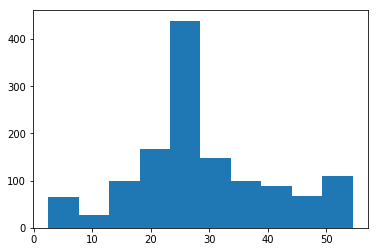

In [180]:
plt.hist(df.Age)

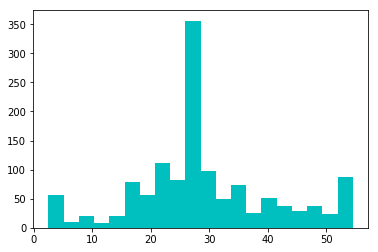

In [181]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

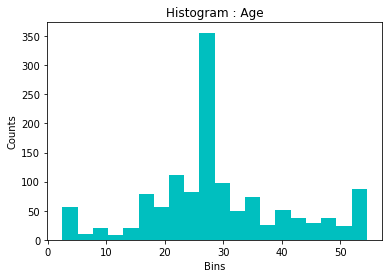

In [182]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

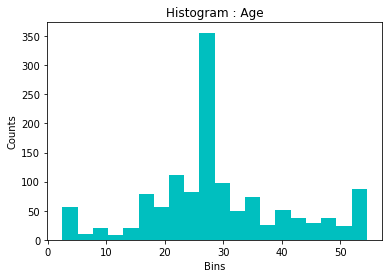

In [183]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

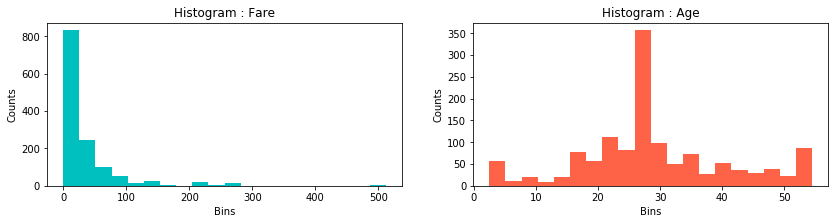

In [184]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

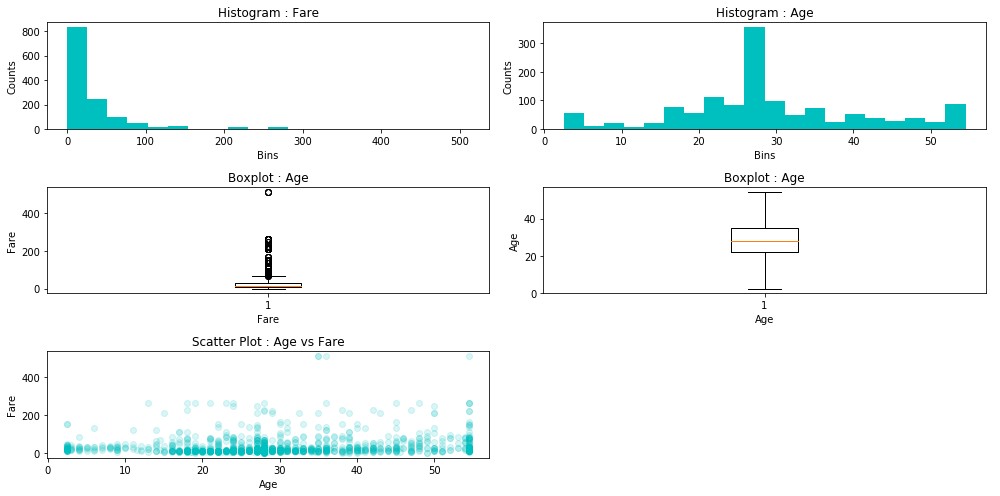

In [185]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()
#Automatically adjust the subplots to give some padding between them
plt.show()

In [186]:
# family size 
family_survived = pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived)
print(family_survived)

Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


In [187]:
# impact of family size on survival rate - ie factor + factor - stacked bar-plot
family_survived =  df[df.Survived != -888].groupby(['FamilySize','Survived']).size().unstack()
#gives the frequency table
print(family_survived)

Survived        0      1
FamilySize              
1           374.0  163.0
2            72.0   89.0
3            43.0   59.0
4             8.0   21.0
5            12.0    3.0
6            19.0    3.0
7             8.0    4.0
8             6.0    NaN
11            7.0    NaN


In [188]:
family_survived.columns = ['Not Survived', 'Survived']

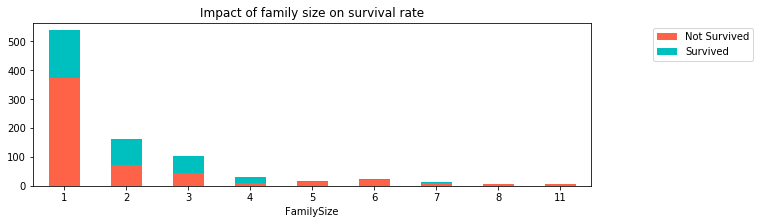

In [189]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [190]:
#percentage of families of different sizes that survived.
family_survived

,Not Survived,Survived
FamilySize,,
1,374.0,163.0
2,72.0,89.0
3,43.0,59.0
4,8.0,21.0
5,12.0,3.0
6,19.0,3.0
7,8.0,4.0
8,6.0,NaN
11,7.0,NaN


In [191]:
scaled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0) 
#sum is column-wise reduce operation i.e rowsums and div is row-wise reduce operation 
#i.e divide this column by sum column
scaled_family_survived

,Not Survived,Survived
FamilySize,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,NaN
11,1.000000,NaN


In [192]:
scaled_family_survived.columns = ['Not Survived', 'Survived']

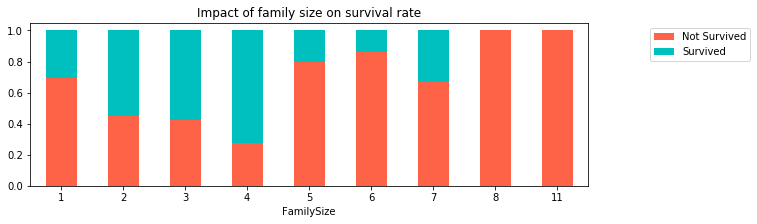

In [193]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
scaled_family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()